<a href="https://colab.research.google.com/github/JadonTelep/MAT-422/blob/main/SP_24_MAT_422_4_2__Graph_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Network Analysis

## 4.1 Introduction

Network analysis is essential in the analysis of data not only because social networks create a huge amount of data, but also many data are network structured. One of the simple ways to introduce a network structure is to analyze correlations between variables and create correlation networks, which are widely used data mining methods for studying biological networks (e.g., biological networks) based on pairwise correlations between variables.

Networks can be conveniently modeled by graphs, which we often refer to as a social graph. The individuals within a network are the nodes, and an edge connects two nodes if the nodes are related by the relationship that characterizes the network. The explosive growth of social media in recent years has attracted millions of end users, thus creating social graphs with millions of nodes and billions of edges reflecting the interactions and relationship between these nodes.

Networks often exhibit community structure with inherent clusters. Detecting clusters or communities is one of the critical tasks in network analysis because of its broad applications to matters such as friend recommendations, link predictions, and collaborative filtering in online social networks. From the graph theory perspective, clustering and community
detection essentially are to discover a group of nodes in a graph that are more connected with each other within the group than those nodes outside the group. Given the size and complexity of today's networks, clustering and community detection in these networks face the inherent challenges.

Communities (clusters) are essential to gain spatio-temporal inside into big data sets from networks. Spatial distances often describe the strength of network connectivity among communities (clusters) rather than individual nodes. As a result, good clustering results will enable us to capture key characteristics of data sets in networks.

In this chapter, we discuss graph models of online social networks and clustering techniques. Although there exist many clustering algorithms such as k-means clustering, in this book we focus on spectral clustering analysis because our data from online social networks are graph structured. Part of the materials in this chapter is based on the authors' papers [67] on design and analysis of influenza-like illness in the US.

## 4.2 Graph modeling

In this section, we briefly review some of the common notation used in graphs. Any graph consists of both a set of objects, called nodes, and the connections between these nodes, called edges. Mathematically, a graph $G$ is denoted as pair $G(V, E)$, where $V=\left\{v_{1}, v_{2}, \ldots v_{n}\right\}$ represents the set of nodes and $E=\left\{e_{1}, e_{2}, \ldots, e_{m}\right\}$ represents the set of edges and the size of the set is commonly shown as $m=|E|$. Edges are also represented by their endpoints (nodes), so $e\left(v_{1}, v_{2}\right)$ or ( $v_{1}, v_{2}$ ) defines an edge between nodes $v_{1}$ and $v_{2}$. Edges can have directions if one node is connected to another, but not vice versa. When edges have directions, $e\left(v_{1}, v_{2}\right)$ is not the same as $e\left(v_{2}, v_{1}\right)$. When edges are undirected, nodes are connected both ways and are called undirected edges and this kind of graph is called an undirected graph. Graphs that only have directed edges are called directed graphs and ones that only have undirected edges are called undirected graphs. Finally, mixed graphs have both directed and undirected edges.

A sequence of edges where nodes and edges are distinct, $e_{1}\left(\nu_{1}, \nu_{2}\right)$, $e_{2}\left(v_{2}, v_{3}\right), e_{3}\left(v_{3}, v_{4}\right), \ldots, e_{i}\left(v_{i}, v_{i+1}\right)$, is called a path. A closed path is called a cycle. The length of a path or cycle is the number of edges traversed in the path or cycle. In a directed graph, we only count directed paths because traversal of edges is only allowed in the direction of the edges. For a connected graph, multiple paths can exist between any pair of nodes. Often, we are interested in the path that has the shortest length. This path is
called the shortest path. We will also use the shortest path as the distance for modeling on networks. The concept of the neighborhood of a node $v_{i}$ can be generalized using shortest paths. An $n$-hop neighborhood of node $v_{i}$ is the set of nodes that are within $n$ hops distance from the node $v_{i}$.

The degree of a node in a graph, which is the number of edges connected to the node, plays a significant role in the study of graphs. For a directed graph, there are two types of degrees (1) in-degrees (edges toward the node) and (2) out-degrees (edges away from the node). In a network, nodes with the most connections possess the greatest degree of centrality. Degree centrality measures relative levels of importance. We often regard people with many interpersonal connections to be more important than those with few. In-degree centrality describes the popularity of a node and its prominence or prestige. Out-degree centrality describes the gregariousness of the node. For social media, degree represents the number of friends for each given user. On Facebook, a degree represents the number of friends. For Twitter, in-degree and out-degree show the number of followers and followees, respectively.

A graph with $n$ nodes can be represented by a $n \times n$ adjacency matrix. A value of 1 at row $i$, column $j$ in the adjacency matrix indicates a connection between nodes $v_{i}$ and $v_{j}$, and a value of 0 denotes no connection between the two nodes. When generalized, any real number can be used to show the strength of connection between two nodes. In directed graphs, we can have two edges between $i$ and $j$ (one from $i$ to $j$ and one from $j$ to $i$ ), whereas in undirected graphs only one edge can exist. As a result, the adjacency matrix for directed graphs is not in general symmetric, whereas the adjacency matrix for undirected graphs is symmetric $\left(A=A^{T}\right)$. In social media, there are many directed and undirected networks. For instance, Facebook is an undirected network and Twitter is a directed network.

Consider a weighted graph $G=(V, E)$ with $n$ vertices and $m$ edges each with weights $E_{i, j}$ connecting nodes $i, j$. The adjacency of matrix $M$ of a graph is defined by $M_{i j}=E_{i j}$ if there is an edge $\{i, j\}$ and $M_{i j}=0$, otherwise. The Laplacian matrix $L$ of G is an $n$ by $n$ symmetric matrix, with one row and column for each vertex, such that
$$
L_{i j}=\left\{\begin{array}{lr}
\sum_{k} E_{i k}, & i=j \\
-E_{i j}, & i \neq j, \text { and } v_{i} \text { is adjacent to } v_{j} \\
0, & \text { otherwise }
\end{array}\right.
$$

In addition, a $n \times m$ incidence matrix of $G$, denoted by $I_{G}$ has one row per vertex and one column per edge. The column corresponding to edge

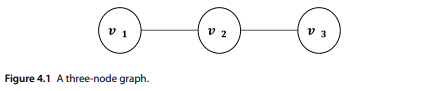

$\{i, j\}$ of $I_{G}$ is zero except the $i$ th and $j$ th entries, which are $\sqrt{E_{i j}}$ and $-\sqrt{E_{i j}}$, respectively. The adjacent matrix can effectively describe a graph as demonstrated in the following two examples.

**Example 4.2.1.** Given a graph in Fig. 4.1, its adjacency matrix is
$$
A=\left(\begin{array}{lll}
0 & 1 & 0  \tag{4.2.1}\\
1 & 0 & 1 \\
0 & 1 & 0
\end{array}\right)
$$

We wish to use a vector $\mathbf{c}$ to describe the significance of each node by multiplying the corresponding degree of each node.
$$
\lambda \mathbf{c}=A \mathbf{c}
$$
which is
$$
(A-\lambda I) \mathbf{c}=0
$$

Assuming that $\mathbf{c}=\left[\begin{array}{lll}u_{1} & u_{2} & u_{3}\end{array}\right]^{T}$,
$$
\left(\begin{array}{ccc}
0-\lambda & 1 & 0 \\
1 & 0-\lambda & 1 \\
0 & 1 & 0-\lambda
\end{array}\right)\left(\begin{array}{l}
u_{1} \\
u_{2} \\
u_{3}
\end{array}\right)=\left(\begin{array}{l}
0 \\
0 \\
0
\end{array}\right)
$$

Because $\mathbf{c} \neq\left[\begin{array}{lll}0 & 0 & 0\end{array}\right]^{T}$, the characteristic equation is
$$
\operatorname{det}(A-\lambda I)=\left|\begin{array}{ccc}
0-\lambda & 1 & 0 \\
1 & 0-\lambda & 1 \\
0 & 1 & 0-\lambda
\end{array}\right|=0
$$
which is the same as
$$
-\lambda\left(\lambda^{2}-1\right)(-1)-\lambda=2 \lambda-\lambda^{3}=\lambda\left(2-\lambda^{2}\right)=0
$$

Therefore the eigenvalues are $(-\sqrt{2}, 0, \sqrt{2})$. The largest eigenvalue is $\sqrt{2}$, and that is what we choose to compute. The computed corresponding
eigenvector is
$$
\left(\begin{array}{ccc}
0-\sqrt{2} & 1 & 0 \\
1 & 0-\sqrt{2} & 1 \\
0 & 1 & 0-\sqrt{2}
\end{array}\right)\left(\begin{array}{l}
u_{1} \\
u_{2} \\
u_{3}
\end{array}\right)=\left(\begin{array}{l}
0 \\
0 \\
0
\end{array}\right) .
$$

Assuming the $\mathbf{c}$ vector has norm is 1 , the solution for it is
$$
\mathbf{C}_{\mathbf{e}}=\left[\begin{array}{l}
u_{1} \\
u_{2} \\
u_{3}
\end{array}\right]=\left[\begin{array}{c}
\frac{1}{2} \\
\frac{\sqrt{2}}{2} \\
\frac{1}{2}
\end{array}\right]
$$
which states that node $v_{2}$ is the most central node, while nodes $v_{1}$ and $v_{3}$ possess equal centrality values.

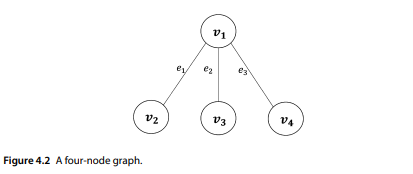

**Example 4.2.2.** Given a graph as in Fig. 4.2, its adjacency matrix is
$$
A=\left(\begin{array}{cccc}
0 & e_{1} & e_{2} & e_{3} \\
e_{1} & 0 & 0 & 0 \\
e_{2} & 0 & 0 & 0 \\
e_{3} & 0 & 0 & 0
\end{array}\right)
$$
and its Laplacian matrix is
$$
L=\left(\begin{array}{cccc}
e_{1}+e_{2}+e_{3} & -e_{1} & -e_{2} & -e_{3} \\
-e_{1} & e_{1} & 0 & 0 \\
-e_{2} & 0 & e_{2} & 0 \\
-e_{3} & 0 & 0 & e_{3}
\end{array}\right)
$$
and its incidence matrix is
$$
I_{G}=\left(\begin{array}{ccc}
\sqrt{e_{1}} & -\sqrt{e_{2}} & -\sqrt{e_{3}} \\
-\sqrt{e_{1}} & 0 & 0 \\
0 & \sqrt{e_{2}} & 0 \\
0 & 0 & \sqrt{e_{3}}
\end{array}\right)
$$

A is positive semi-definite can be decomposed into the product of $I_{G}$ and its transpose:
$$
L=I_{G} \cdot I_{G}^{T}
$$
$$
=\left(\begin{array}{ccc}
\sqrt{e_{1}} & -\sqrt{e_{2}} & -\sqrt{e_{3}} \\
-\sqrt{e_{1}} & 0 & 0 \\
0 & \sqrt{e_{2}} & 0 \\
0 & 0 & \sqrt{e_{3}}
\end{array}\right)\left(\begin{array}{cccc}
\sqrt{e_{1}} & -\sqrt{e_{1}} & 0 & 0 \\
-\sqrt{e_{2}} & 0 & \sqrt{e_{2}} & 0 \\
-\sqrt{e_{3}} & 0 & 0 & \sqrt{e_{3}}
\end{array}\right)
$$

Note that
$$
L \mathbf{e}=0, \text { if } \mathbf{e}=\left(\begin{array}{l}
1 \\
1 \\
1 \\
1
\end{array}\right)
$$

Given
$$
\mathbf{x}=\left(\begin{array}{l}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4}
\end{array}\right)
$$
it is easy to see that
$$
I_{G}^{T} \mathbf{x}=\left(\begin{array}{cccc}
\sqrt{e_{1}} & -\sqrt{e_{1}} & 0 & 0 \\
-\sqrt{e_{2}} & 0 & \sqrt{e_{2}} & 0 \\
-\sqrt{e_{3}} & 0 & 0 & \sqrt{e_{3}}
\end{array}\right)\left(\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4}
\end{array}\right)=\left(\begin{array}{c}
\left(x_{1}-x_{2}\right) \sqrt{e_{1}} \\
\left(x_{3}-x_{1}\right) \sqrt{e_{2}} \\
\left(x_{4}-x_{1}\right) \sqrt{e_{3}}
\end{array}\right)
$$

Therefore
$$
\begin{aligned}
\mathbf{x}^{T} L \mathbf{x}=\mathbf{x}^{T} I_{\mathrm{G}} I_{\mathrm{G}}^{T} \mathbf{x}= & \left(I_{\mathrm{G}}^{T} \mathbf{x}\right)^{T} \cdot\left(I_{\mathrm{G}}^{T} \mathbf{x}\right) \\
= & \left(\begin{array}{ll}
\left(x_{1}-x_{2}\right) \sqrt{e_{1}} & \left(x_{3}-x_{1}\right) \sqrt{e_{2}} \\
\left(x_{4}-x_{1}\right) \sqrt{e_{3}}
\end{array}\right) \\
& \times\left(\begin{array}{c}
\left(x_{1}-x_{2}\right) \sqrt{e_{1}} \\
\left(x_{3}-x_{1}\right) \sqrt{e_{2}} \\
\left(x_{4}-x_{1}\right) \sqrt{e_{3}}
\end{array}\right) \\
= & \left(x_{1}-x_{2}\right)^{2} e_{1}+\left(x_{3}-x_{1}\right)^{2} e_{2}+\left(x_{4}-x_{1}\right)^{2} e_{3} \\
= & \sum_{(i, j) \in E} E_{i j}\left(x_{i}-x_{j}\right)^{2}
\end{aligned}
$$

We can summarize the above example and state the following properties of $L([15,16])$.

**Theorem 4.2.3.** The Laplacian matrix $L$ of has the following properties:
1. $L=D-M$, where $M$ is the adjacency matrix and $D$ is the diagonal degree matrix with $D_{i i}=\sum_{k} E_{i k}$.
2. $L=I_{G} I_{G}^{T}$.
3. L is symmetric positive semi-definite. All eigenvalues of $L$ are real and nonnegative, and $L$ has a full set of $n$ real and orthogonal eigenvectors.
4. Let $\mathbf{e}=[1, \ldots, 1]^{T}$. Then $\mathbf{L} \mathbf{e}=0$. Thus 0 is the smallest eigenvalue and $e$ is the corresponding eigenvector.
5. If the graph $G$ has $c$ connected components, then $L$ has $c$ eigenvalues that is 0 .
6. For any vector $\mathbf{x}, \mathbf{x}^{T} L \mathbf{x}=\sum_{\{i, j\} \in E} E_{i j}\left(x_{i}-x_{j}\right)^{2}$.
7. For any vector $\mathbf{x}$ and scalars $\alpha, \beta,(\alpha \mathbf{x}+\beta \mathbf{e})^{T} L(\alpha \mathbf{x}+\beta \mathbf{e})=\alpha^{2} \mathbf{x}^{T} L \mathbf{x}$.
8. The problem
$$
\begin{equation*}
\min _{\mathbf{x} \neq 0} \mathbf{x}^{T} \text { L } \mathbf{x}, \text { subject to }, \mathbf{x}^{T} \mathbf{x}=1, \mathbf{x}^{T} \mathbf{e}=0 \tag{4.2.2}
\end{equation*}
$$
is solved when $x$ is the eigenvector corresponding to the second smallest eigenvalue (the Fiedler vector) $\lambda_{2}$ of the eigenvalue problem
$$
\begin{equation*}
L \mathbf{x}=\lambda \mathbf{x} \tag{4.2.3}
\end{equation*}
$$

The first 6 statements can be easily verified by computation as in Example 4.2.2. In particular, the statement 5 comes from the fact, if a graph has more than one connected components, $L$ can be rearranged into a few blocks, each of them has a Laplacian matrix whose first eigenvalue is zero. The statement 7 is a direct consequent of the statement 4 . Here, we use an
example to demonstrate the computation in the first 6 statements. The last statement of Theorem 4.2.3 results from the following result, which is also useful for many optimization problem.

**Theorem 4.2.4** (Courant-Fischer theorem). Let $A$ be $n \times n$ symmetric matrix $A$ with the an orthogonal diagonalization $A=P D P^{-1}$. The columns of $P$ are orthonormal eigenvectors $\mathbf{v}_{1}, \ldots, \mathbf{v}_{n}$ of $A$. Assume that the diagonal of $D$ are arranged so that $\lambda_{1} \leq \lambda_{2}, \ldots . \leq \lambda_{n}$. Let $S_{k}$ be the span of $\mathbf{v}_{1}, \ldots, \mathbf{v}_{k}$ and $S_{k}^{\perp}$ denote the orthogonal complement of $S_{k}$. Then
$$
\min _{\mathbf{x} \neq 0, \mathbf{x} \in S_{k-1}^{\perp}} \frac{\mathbf{x}^{T} A \mathbf{x}}{\mathbf{x}^{T} \mathbf{x}}=\lambda_{k} .
$$

When $k=2, S_{1}^{\perp}$ is all $\mathbf{x}$ such that
$$
\mathbf{x} \perp \mathbf{v}_{\mathbf{1}} \text {, or } \mathbf{v}_{\mathbf{1}}{ }^{T} \cdot \mathbf{x}=0,
$$
which implies the following result.

**Corollary 4.2.5.** Let $A$ be $n \times n$ symmetric matrix $A$ with the orthogonal diagonalization $t A=P D P^{-1}$. The columns of $P$ are orthonormal eigenvectors $\mathbf{v}_{1}, \ldots, \mathbf{v}_{n}$ of $A$. Assume that the diagonal of $D$ are arranged so that $\lambda_{1} \leq \lambda_{2}, \ldots . \leq \lambda_{n}$. Then
$$
\min _{\mathbf{x} \neq 0, \mathbf{x}^{T} \mathbf{v}_{1}=0} \frac{\mathbf{x}^{T} A \mathbf{x}}{\mathbf{x}^{T} \mathbf{x}}=\lambda_{2}
$$

Proof. From the assumption, we have
$$
A=P\left(\begin{array}{lll}
\lambda_{1} & & \\
& \ddots & \\
& & \lambda_{n}
\end{array}\right) P^{T}
$$
and
$$
P=\left[\begin{array}{lll}
\mathbf{v}_{\mathbf{1}} & \cdots & \mathbf{v}_{\mathbf{n}}
\end{array}\right] .
$$

Rearranging the terms gives
$$
P^{T} A P=\left(\begin{array}{lll}
\lambda_{1} & & \\
& \ddots & \\
& & \lambda_{n}
\end{array}\right)
$$

In addition, note that
$$
A \mathbf{v}_{\mathbf{i}}=\lambda_{i} \mathbf{v}_{\mathbf{i}}
$$
$$
\mathbf{x}=P \mathbf{y}
$$
and
$$
\sum x_{i}^{2}=\sum y_{i}^{2}
$$

Now take any $\mathbf{x}$ such that $\mathbf{x} \in S_{k-1}^{\perp}$ and $\mathbf{v}_{\mathbf{i}}{ }^{T} \cdot \mathbf{x}=0$ for $i=1, \ldots k-1$,
$$
\mathbf{y}=P^{T} \mathbf{x}=\left[\begin{array}{c}
\mathbf{v}_{\mathbf{1}}^{T} \\
\vdots \\
\mathbf{v}_{\mathbf{n}}^{T}
\end{array}\right] \mathbf{x}=\left[\begin{array}{c}
\mathbf{v}_{\mathbf{1}}^{T} \cdot \mathbf{x} \\
\vdots \\
\mathbf{v}_{\mathbf{n}}^{T} \cdot \mathbf{x}
\end{array}\right]
$$
and
$$
\frac{\mathbf{x}^{T} A \mathbf{x}}{\sum x_{i}^{2}}=\frac{\lambda_{k} y_{k}^{2}+\cdots+\lambda_{n} y_{n}^{2}}{\sum y_{i}^{2}} \geq \lambda_{k}
$$

In particular, when $y_{1}=0, \ldots, y_{k-1}=0, y_{k}=1, y_{k+1}=0, \ldots, y_{n}=0, \frac{\mathbf{x}^{T} A \mathbf{x}}{\sum x_{i}^{2}}=$ $\lambda_{k}$.

**EXAMPLE:** Create a simple graph and find the adjecency matrix, degree matrix, and laplacian matrix. Find the eigenvalues and eigenvectors of the laplacian matrix to find the Fiedler vector. The simple weighted non-directional graph used is $[(1, 2, 3), (2, 3, 2)]$.

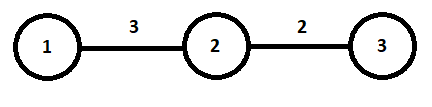

In other words, for the graph with edges:

$(1, 2, 3)$: An edge from node 1 to node 2 with weight 3.

$(2, 3, 2)$: An edge from node 2 to node 3 with weight 2.

The adjacency matrix A will be a 3x3 matrix where:

$A[1, 2] = 3$ (edge from node 1 to node 2 with weight 3),

$A[2, 1] = 3$ (edge from node 1 to node 2 with weight 3),

$A[2, 3] = 2$ (edge from node 2 to node 3 with weight 2),

$A[3, 2] = 2$ (edge from node 2 to node 3 with weight 2)

All other entries will be 0 because there are no other edges.

$
A=\left(\begin{array}{lll}
0 & 3 & 0 \\
3 & 0 & 2 \\
0 & 2 & 0
\end{array}\right)
$

The degree matrix is a diagonal matrix that contains the degree of each node on its diagonal. The degree of a node is the sum of the weights of the edges, connected to that node.

$
D=\left(\begin{array}{lll}
3 & 0 & 0 \\
0 & 5 & 0 \\
0 & 0 & 2
\end{array}\right)
$

and the laplacian matrix would be the difference of the two matrix so that $L = D - A$

$
L=\left(\begin{array}{lll}
3 & -3 & 0 \\
-3 & 5 & -2 \\
0 & -2 & 2
\end{array}\right)
$

Use *scipy.linalg.eig()* function to find the eigenvector eigenvalues and eigenvector of the laplacian matrix.

$
λ=\left(\begin{array}{lll}
0 & -\sqrt(7)+5 & \sqrt(7)+5 \\
\end{array}\right)
$

$
v=\left(\begin{array}{lll}
1 & \frac{-\sqrt(7)+1}{2} & \frac{-\sqrt(7)+1}{2} \\
1 & \frac{-\sqrt(7)-3}{2} & \frac{-\sqrt(7)-3}{2} \\
1 & 1 & 1
\end{array}\right)
$

The Fiedler vector would be the second smallest eigenvalue of the Laplacian matrix.

$
v_F = \left(\begin{array}{lll}
\frac{-\sqrt(7)+1}{2} & \frac{-\sqrt(7)-3}{2} & 1 \\
\end{array}\right)
$

Use the degree matrix to find the degree centrality

$
\left(\begin{array}{lll}
0.6 & 1 & 0.4 \\
\end{array}\right)
$

and the Fiedler vector for the spectral centrality

$
\left(\begin{array}{lll}
0.823 & 2.823 & 1 \\
\end{array}\right)
$

Both the degree centrality and spectral centrality indicate that he 2nd node is more connected then the 1st and 3rd node.

In [28]:
import networkx as nx
import numpy as np
import scipy.linalg as la

# Create a simple weighted graph
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 3), (2, 3, 2)])

# Get the adjacency matrix (with node labels 1, 2, 3)
A = nx.to_numpy_array(G, nodelist=[1, 2, 3])
print("Adjacency Matrix:\n", A)

# Degree matrix
degrees = np.sum(A, axis=1)  # Sum weights along rows (out-degree)
D = np.diag(degrees)
print("\nDegree Matrix:\n", D)

# Laplacian matrix
L = D - A
print("\nLaplacian Matrix (L):\n", L)

# Eigenvalues and eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = la.eig(L)

# Sort the eigenvalues in ascending order
sorted_indices = np.argsort(eigenvalues)
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

print("\nEigenvalues of the Laplacian:\n", np.round(eigenvalues_sorted,3))
print("\nEigenvectors of the Laplacian:\n", np.round(eigenvectors_sorted,2))

# Fiedler vector (second smallest eigenvalue)
fiedler_vector = eigenvectors_sorted[:, 2]  # second eigenvector
print("\nFiedler Vector (Second Smallest Eigenvector):\n", np.round(fiedler_vector,3))

# Degree centrality calculation
node_degrees = np.diagonal(D)  # Get diagonal entries (degrees of nodes)
max_degree = np.max(node_degrees)  # Find the maximum degree in the graph

# Degree centrality for each node
degree_centrality = node_degrees / max_degree
print("\nDegree Centrality (normalized):", degree_centrality)

# Spectral centrality based on the Fiedler vector (magnitude of the eigenvector components)
spectral_centrality = np.abs(fiedler_vector)
print("\nSpectral Centrality (based on the Fiedler vector):", np.round(spectral_centrality,3))


Adjacency Matrix:
 [[0. 3. 0.]
 [3. 0. 2.]
 [0. 2. 0.]]

Degree Matrix:
 [[3. 0. 0.]
 [0. 5. 0.]
 [0. 0. 2.]]

Laplacian Matrix (L):
 [[ 3. -3.  0.]
 [-3.  5. -2.]
 [ 0. -2.  2.]]

Eigenvalues of the Laplacian:
 [-0.   +0.j  2.354+0.j  7.646+0.j]

Eigenvectors of the Laplacian:
 [[ 0.58 -0.63 -0.52]
 [ 0.58 -0.14  0.81]
 [ 0.58  0.77 -0.29]]

Fiedler Vector (Second Smallest Eigenvector):
 [-0.52   0.805 -0.285]

Degree Centrality (normalized): [0.6 1.  0.4]

Spectral Centrality (based on the Fiedler vector): [0.52  0.805 0.285]
